In [1]:
from collections import defaultdict
import itertools as itt
from sys import stdout

import numpy as np
from numpy.polynomial.polynomial import Polynomial, polyfit
from sympy import symbols
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as _A  # imported for "side effects"

import heisenberg

## The parameters: Generating set and n

In [4]:
S1 = [np.array((0, 0, 0)),
      np.array((1, 0, 0)),
      np.array((1, 1, 0))]
S2 = [np.array((0, 0, 0)),
      np.array((0, 1, 0)),
      np.array((1, 1, 0))]
S_both = [np.array((0, 0, 0)),
          np.array((1, 1, 0))]
S = [np.array((0, 0, 0)),
     np.array((1, 0, 0)),
     np.array((0, 1, 0)),
     np.array((1, 1, 0))]

In [13]:
n = 8

## Experiments

In [42]:
S1_p_n = list(heisenberg.compute_h3_pn(S1, n))
S2_p_n = list(heisenberg.compute_h3_pn(S2, n))
S_both_p_n = list(heisenberg.compute_h3_pn(S_both, n))
p_n = list(heisenberg.compute_h3_pn(S, n))

In [66]:
plot_stuff = [
    (heisenberg.PlotForm.from_pt_set(S1_p_n), 'tomato'),     # tomato
    (heisenberg.PlotForm.from_pt_set(S2_p_n), 'navy'),  # lightblue
    (heisenberg.PlotForm.from_pt_set(S_both_p_n), 'green'),  # green
]

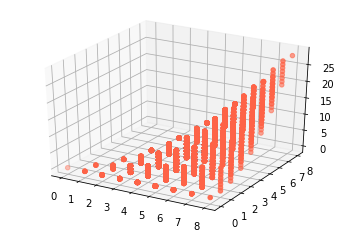

In [67]:
fig = plt.figure()
plotted_h3, color = plot_stuff[0]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

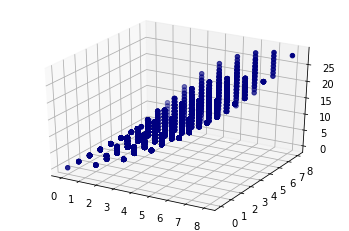

In [68]:
fig = plt.figure()
plotted_h3, color = plot_stuff[1]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

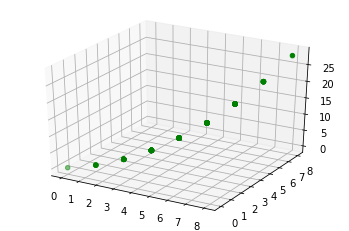

In [60]:
fig = plt.figure()
plotted_h3, color = plot_stuff[2]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

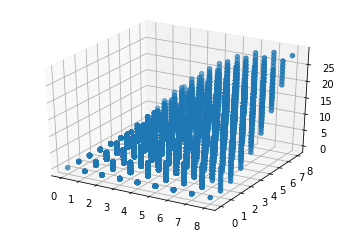

In [46]:
fig = plt.figure()
plotted_h3 = heisenberg.PlotForm.from_pt_set(p_n)
plotted_h3.plotme(fig)
plt.show(fig)

In [69]:
def plot_with_view_params(azim_, elev_=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for plotform, color in plot_stuff:
        ax.scatter(plotform.xs, plotform.ys, plotform.zs, color=color)
    ax.view_init(azim=azim_, elev=elev_)
    plt.show(fig)

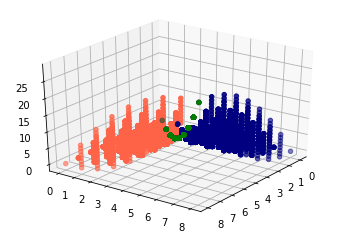

In [70]:
plot_with_view_params(36)

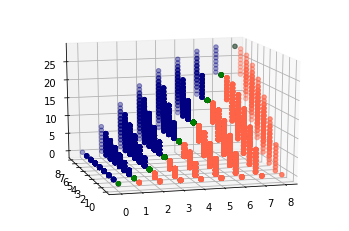

In [71]:
plot_with_view_params(-105, 15)

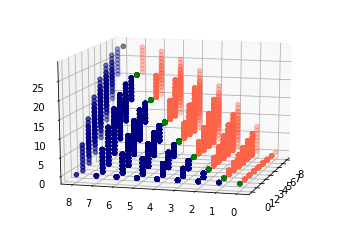

In [72]:
plot_with_view_params(-165, 15)

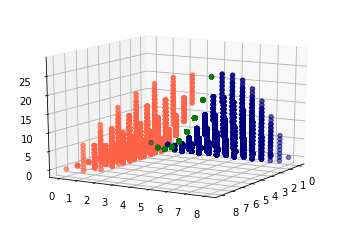

In [73]:
plot_with_view_params(30, 15)

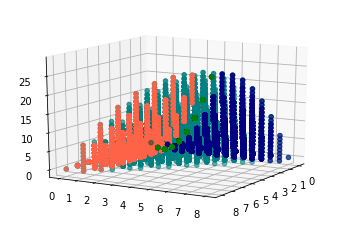

In [76]:
# Now let's also plot the points that are in the full point cloud but not in the smaller two.
AZIM = 30
ELEV = 15

plotted_other = heisenberg.PlotForm.from_pt_set(p_n)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plotted_other.xs, plotted_other.ys, plotted_other.zs, color='teal')
for plotform, color in plot_stuff:
    ax.scatter(plotform.xs, plotform.ys, plotform.zs, color=color)
ax.view_init(azim=AZIM, elev=ELEV)
plt.show(fig)

### Plots in the plane

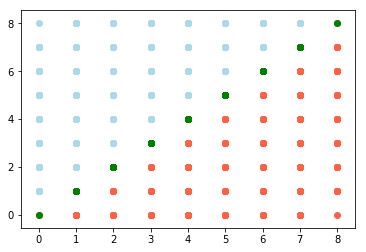

In [39]:
for plotform, color in plot_stuff:
    plt.scatter(plotform.xs, plotform.ys, color=color)
plt.show()

Now with the line $x + y = n$:

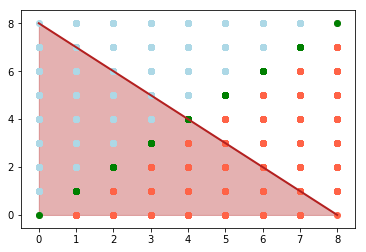

In [41]:
LINE_COLOR = (0.7, 0.125, 0.125, 1)
SHADING_COLOR = (0.7, 0.125, 0.125, 0.35)

line_x = (0, n)
line_y = (n, 0)
plt.fill_between((0, n), line_y, color=SHADING_COLOR)
plt.plot(line_x, line_y, c=LINE_COLOR, lw=2)
for plotform, color in plot_stuff:
    plt.scatter(plotform.xs, plotform.ys, color=color)
plt.show()

## Counting functions
Well... it's easy to see that $S_1 \cap S_2$ should give $|P_n(S_1 \cap S_2)| = n + 1$, since it's just the zero tuple and something else. You can choose to take any number of nonzero tuples from 0 to n, and the number of nonzero tuples is all that matters, so there are $n + 1$ possible output tuples. So, $|P_n(S_1 \cap S_2)| = n+1$. What about the other two? Do they combine in some nice way to give the points of $P_n$? Or at least the *number* of points in $P_n$?

Let's try and fit quartic polynomials to the number of points in the other two pieces -- the $S_1$ piece and the $S_2$ piece. Hopefully something nice will come out of that. As a reminder, our polynomial for $S$ is

$$\left|P_n\right| = \frac{1}{6}n^4 + \frac{1}{6}n^3 + \frac{5}{6}n^2 + \frac{11}{6}n + 1.$$

In [6]:
# S_1
POLYNOMIAL_MAX_COMBINATION_SIZE = 10
POLYNOMIAL_DEGREE = 4

P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(S1, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.41666667, 0.45833333, 0.08333333, 0.04166667])

In [7]:
# S_2
POLYNOMIAL_MAX_COMBINATION_SIZE = 10
POLYNOMIAL_DEGREE = 4

P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(S2, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.41666667, 0.45833333, 0.08333333, 0.04166667])

Interesting. It looks like they have the same number of points. That makes sense -- they look symmetric. It looks like each piece satisfies

$$|P_n(S_1)| = |P_n(S_2)| = \frac{1}{24}n^4 + \frac{1}{12}n^3 + \frac{11}{24}n^2 + \frac{17}{12}n + 1.$$

This means that the union of the point clouds has...

\begin{align}
|P_n(S_1) \cup P_n(S_2)| &= |P_n(S_1)| + |P_n(S_2)| - |P_n(S_1) \cap P_n(S_2)|  \\
                         &= 2|P_n(S_1)| - (n + 1) \\
                         &= \frac{1}{12}n^4 + \frac{1}{6}n^3 + \frac{11}{12}n^2 + \frac{11}{6}n + 1.
\end{align}

But we have

\begin{align}
|P_n(S)| - |P_n(S_1) \cup P_n(S_2)| &= \frac{1}{12}n^4 - \frac{1}{12}n^2 \\
                                    &= \frac{1}{12}n^2(n^2 - 1)
\end{align}

# Tetrahedron experiments

In [13]:
TS1 = [np.array((0, 0, 0)),
       np.array((1, 0, 0)),
       np.array((0, 1, 0))]
TS2 = [np.array((1, 0, 0)),
       np.array((0, 1, 0)),
       np.array((0, 0, 1))]
TS_both = [np.array((1, 0, 0)),
           np.array((0, 1, 0))]
TS = [np.array((0, 0, 0)),
      np.array((1, 0, 0)),
      np.array((0, 1, 0)),
      np.array((0, 0, 1))]

In [14]:
tn = 8

## Experiments

In [10]:
TS1_p_n = list(heisenberg.compute_h3_pn(TS1, tn))
TS2_p_n = list(heisenberg.compute_h3_pn(TS2, tn))
TS_both_p_n = list(heisenberg.compute_h3_pn(TS_both, tn))
TS_p_n = list(heisenberg.compute_h3_pn(TS, tn))

In [15]:
T_plot_stuff = [
    (heisenberg.PlotForm.from_pt_set(TS1_p_n), 'tomato'),     # tomato
    (heisenberg.PlotForm.from_pt_set(TS2_p_n), 'navy'),  # lightblue
    (heisenberg.PlotForm.from_pt_set(TS_both_p_n), 'green'),  # green
]

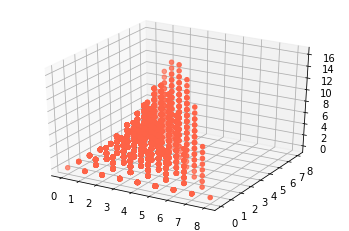

In [16]:
fig = plt.figure()
plotted_h3, color = T_plot_stuff[0]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

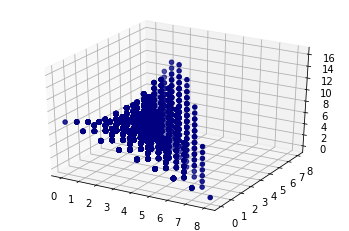

In [17]:
fig = plt.figure()
plotted_h3, color = T_plot_stuff[1]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

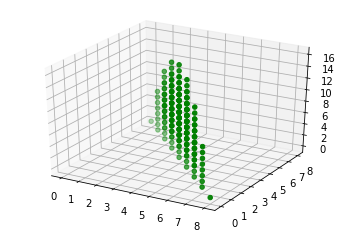

In [46]:
fig = plt.figure()
plotted_h3, color = T_plot_stuff[2]
plotted_h3.plotme(fig, color=color)
plt.show(fig)

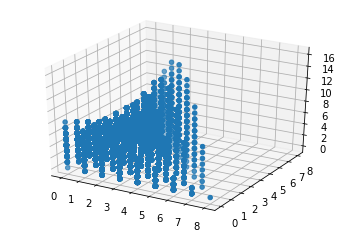

In [19]:
fig = plt.figure()
plotted_h3 = heisenberg.PlotForm.from_pt_set(TS_p_n)
plotted_h3.plotme(fig)
plt.show(fig)

In [22]:
def plot_with_view_params(azim_, elev_=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for plotform, color in T_plot_stuff:
        ax.scatter(plotform.xs, plotform.ys, plotform.zs, color=color)
    ax.view_init(azim=azim_, elev=elev_)
    plt.show(fig)

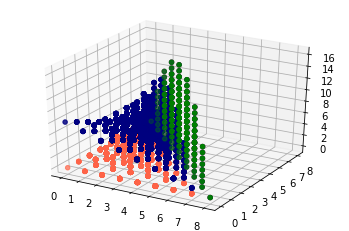

In [27]:
plot_with_view_params(-60)

## Counting functions
Let's fit some polynomials! This time for all three pieces! I won't be able to check the difference right now (2019-10-02) because I don't remember the counting function for the Heisenberg tetrahedron. I'll have to ask Angela or Sean later. Or look at our notes.

In [28]:
POLYNOMIAL_MAX_COMBINATION_SIZE = 10
POLYNOMIAL_DEGREE = 4

In [29]:
# TS_1
P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS1, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.41666667, 0.45833333, 0.08333333, 0.04166667])

In [30]:
# TS_2
P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS2, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.41666667, 0.45833333, 0.08333333, 0.04166667])

In [54]:
[(k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS2, k))), (k**4 + 2*k**3 + 11*k**2 + 34*k + 24)//24)
 for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1)]

[(1, 3, 3),
 (2, 7, 7),
 (3, 15, 15),
 (4, 30, 30),
 (5, 56, 56),
 (6, 98, 98),
 (7, 162, 162),
 (8, 255, 255),
 (9, 385, 385),
 (10, 561, 561)]

In [45]:
# TS_both
P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS_both, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.00000000e+00, 8.33333333e-01, 2.05391260e-14, 1.66666667e-01,
       7.31385157e-16])

In [53]:
[(k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS_both, k))), (k**3 + 5*k + 6)//6)
 for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1)]

[(1, 2, 2),
 (2, 4, 4),
 (3, 8, 8),
 (4, 15, 15),
 (5, 26, 26),
 (6, 42, 42),
 (7, 64, 64),
 (8, 93, 93),
 (9, 130, 130),
 (10, 176, 176)]

In [32]:
# TS
P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS, k)))) )

fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.75      , 0.95833333, 0.25      , 0.04166667])

In [57]:
[(k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS, k))), (k**4 + 6*k**3 + 23*k**2 + 42*k + 24)//24)
 for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1)]

[(1, 4, 4),
 (2, 11, 11),
 (3, 25, 25),
 (4, 50, 50),
 (5, 91, 91),
 (6, 154, 154),
 (7, 246, 246),
 (8, 375, 375),
 (9, 550, 550),
 (10, 781, 781)]

In [33]:
[ (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(TS_both, k)))) for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1)]
    

[(1, 2),
 (2, 4),
 (3, 8),
 (4, 15),
 (5, 26),
 (6, 42),
 (7, 64),
 (8, 93),
 (9, 130),
 (10, 176)]

Okay, so...

$$|P_n(S)| = \frac{1}{24}n^4 + \frac{1}{4}n^3 + \frac{23}{24}n^2 + \frac{7}{4}n + 1.$$

We also have

\begin{align}
|P_n(S_1)| = |P_n(S_2)| &= \frac{1}{24}n^4 + \frac{1}{12}n^3 + \frac{11}{24}n^2 + \frac{17}{12}n + 1. \\
|P_n(S_1 \cap S_2)| &= 0n^4 + \frac{1}{6}n^3 + 0n^2 + \frac{5}{6}n + 1.
\end{align}

Note also that in general, we should have

$$|P_n(S_1 \cap S_2)| = |P_n(S_1) \cap P_n(S_2)|$$

This gives

\begin{align}
|P_n(S_1) \cup P_n(S_2)| &= |P_n(S_1)| + |P_n(S_2)| - |P_n(S_1) \cap P_n(S_2)| \\
                         &= 2|P_n(S_1)| - |P_n(S_1) \cap P_n(S_2)| \\
                         &= \frac{1}{12}n^4 + \frac{11}{12}n^2 + 2n.
\end{align}

In [42]:
# check my math for me...
N = symbols('N')
CPN_Si = N**4/24 + N**3/12 + 11*N**2/24 + 17*N/12 + 1
CPN_S1_S2 = N**3/6 + 5*N/6 + 1
2*CPN_Si - CPN_S1_S2

N**4/12 + 11*N**2/12 + 2*N + 1

Now we have

\begin{align}
|P_n(S)| - |P_n(S_1) \cup P_n(S_2)| &= -\frac{1}{24}n^4 + \frac{1}{4}n^3 + \frac{1}{24}n^2 - \frac{1}{4}n \\
                                    &= \frac{1}{24}n\left(-n^3 + 6n^2 + n - 6\right)
\end{align}

In [44]:
N = symbols('N')
CPN_Si_cup = N**4/12 + 11*N**2/12 + 2*N + 1
CPN_S = (N**4)/24 + N**3/4 + 23*N**2/24 + 7*N/4 + 1
CPN_S - CPN_Si_cup

-N**4/24 + N**3/4 + N**2/24 - N/4

## Maximum heights test
$$
S_1 = \{(0, 0, 0), (1, 0, 0), (1, 1, 0)\} \\
S_2 = \{(0, 0, 0), (0, 1, 0), (1, 1, 0)\}
$$

Want to check how the max height of $P_n(S_1)$ and $P_n(S_2)$ compare to the max height of $P_n(S)$. So...

In [33]:
TrS1 = [np.array((1, 0, 0)),
        np.array((2, 0, 0))]
TrS2 = [np.array((1, 0, 0)),
        np.array((1, 1, 0))]
TrS  = [np.array((1, 0, 0)),
        np.array((2, 0, 0)),
        np.array((1, 1, 0))]

In [34]:
TrS1_p_n = list(heisenberg.compute_h3_pn(TrS1, n))
TrS2_p_n = list(heisenberg.compute_h3_pn(TrS2, n))
TrS_p_n  = list(heisenberg.compute_h3_pn(TrS, n))

In [35]:
max_height_TrS1 = max(t[2] for t in TrS1_p_n)
max_height_TrS2 = max(t[2] for t in TrS2_p_n)
max_height_TrS  = max(t[2] for t in TrS_p_n)
print(max_height_TrS1, max_height_TrS2, max_height_TrS)

0 28 40


What about for the square?

In [21]:
SqS1 = [np.array((0, 0, 0)),
        np.array((1, 0, 0)),
        np.array((1, 1, 0))]
SqS2 = [np.array((0, 0, 0)),
        np.array((0, 1, 0)),
        np.array((1, 1, 0))]
SqS = [np.array((0, 0, 0)),
       np.array((1, 0, 0)),
       np.array((0, 1, 0)),
       np.array((1, 1, 0))]

In [22]:
SqS1_p_n = list(heisenberg.compute_h3_pn(SqS1, n))
SqS2_p_n = list(heisenberg.compute_h3_pn(SqS2, n))
SqS_p_n  = list(heisenberg.compute_h3_pn(SqS, n))

In [23]:
max_height_SqS1 = max(t[2] for t in SqS1_p_n)
max_height_SqS2 = max(t[2] for t in SqS2_p_n)
max_height_SqS  = max(t[2] for t in SqS_p_n)
print(max_height_SqS1, max_height_SqS2, max_height_SqS)

28 28 28


In [36]:
TrS1 = [np.array((1, 1, 0)),
        np.array((2, 1, 0))]
TrS2 = [np.array((1, 1, 0)),
        np.array((1, 2, 0))]
TrS  = [np.array((1, 1, 0)),
        np.array((2, 1, 0)),
        np.array((1, 2, 0))]

In [37]:
TrS1_p_n = list(heisenberg.compute_h3_pn(TrS1, n))
TrS2_p_n = list(heisenberg.compute_h3_pn(TrS2, n))
TrS_p_n  = list(heisenberg.compute_h3_pn(TrS, n))

In [38]:
max_height_TrS1 = max(t[2] for t in TrS1_p_n)
max_height_TrS2 = max(t[2] for t in TrS2_p_n)
max_height_TrS  = max(t[2] for t in TrS_p_n)
print(max_height_TrS1, max_height_TrS2, max_height_TrS)

56 56 88


## Nonlinearity test
$$
S_1 = \{(0, 0, 0), (1, 0, 0)\} \\
S_2 = \{(0, 0, 0), (0, 1, 0)\}
$$

The $P_n$ of the union in this case should definitely be bigger than $T_n$ (the $P_n$ size in the commutative case), but this is just to confirm that...

In [3]:
TrS1 = [np.array((0, 0, 0)),
        np.array((1, 0, 0))]
TrS2 = [np.array((0, 0, 0)),
        np.array((0, 1, 0))]
TrS  = [np.array((0, 0, 0)),
        np.array((1, 0, 0)),
        np.array((0, 1, 0))]

In [14]:
TrS1_p_n = list(heisenberg.compute_h3_pn(TrS1, n))
TrS2_p_n = list(heisenberg.compute_h3_pn(TrS2, n))
TrS_p_n  = list(heisenberg.compute_h3_pn(TrS, n))

In [20]:
TrS1_p_n_size = len(set(tuple(t) for t in TrS1_p_n))
TrS2_p_n_size = len(set(tuple(t) for t in TrS2_p_n))
TrS_p_n_size  = len(set(tuple(t) for t in TrS_p_n))
print(TrS1_p_n_size, TrS2_p_n_size, TrS_p_n_size, n*(n+1)//2)

9 9 255 36


## Checking whether $P_n$ of pieces is $P_n$ of intersection
Sanity check: It should work for the triangle.

In [79]:
TrS1 = [np.array((0, 0, 0)),
        np.array((1, 0, 0))]
TrS2 = [np.array((0, 0, 0)),
        np.array((0, 1, 0))]
TrS_both = [np.array((0, 0, 0))]

In [80]:
TrS1_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS1, n))
TrS2_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS2, n))
TrS_both_p_n  = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS_both, n))

In [81]:
TrS1_p_n.intersection(TrS2_p_n) == TrS_both_p_n

True

Okay, it does work for the triangle. Now does it work for the square?

In [82]:
SqS1     = [np.array((0, 0, 0)),
            np.array((1, 0, 0)),
            np.array((1, 1, 0))]
SqS2     = [np.array((0, 0, 0)),
            np.array((0, 1, 0)),
            np.array((1, 1, 0))]
SqS_both = [np.array((0, 0, 0)),
            np.array((1, 1, 0))]

In [83]:
SqS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(SqS1, n))
SqS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(SqS2, n))
SqS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(SqS_both, n))

In [84]:
SqS1_p_n.intersection(SqS2_p_n) == SqS_both_p_n

True

What about if we do the tetrahedron?

In [85]:
TetS1     = [np.array((0, 0, 0)),
             np.array((1, 0, 0)),
             np.array((0, 0, 1))]
TetS2     = [np.array((0, 0, 0)),
             np.array((0, 1, 0)),
             np.array((0, 0, 1))]
TetS_both = [np.array((0, 0, 0)),
             np.array((0, 0, 1))]

In [86]:
TetS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(TetS1, n))
TetS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(TetS2, n))
TetS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TetS_both, n))

In [87]:
TetS1_p_n.intersection(TetS2_p_n) == TetS_both_p_n

True

What about some shifted triangles? First, let's shift by $(1, 1, 0)$.

In [88]:
TrS1 = [np.array((1, 1, 0)),
        np.array((2, 0, 0))]
TrS2 = [np.array((1, 1, 0)),
        np.array((0, 2, 0))]
TrS_both = [np.array((1, 1, 0))]

In [89]:
TrS1_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS1, n))
TrS2_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS2, n))
TrS_both_p_n  = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS_both, n))

In [90]:
TrS1_p_n.intersection(TrS2_p_n) == TrS_both_p_n

True

Now let's shift by $(1, 0, 0)$.

In [91]:
TrS1 = [np.array((1, 0, 0)),
        np.array((2, 0, 0))]
TrS2 = [np.array((1, 0, 0)),
        np.array((1, 1, 0))]
TrS_both = [np.array((1, 0, 0))]

In [92]:
TrS1_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS1, n))
TrS2_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS2, n))
TrS_both_p_n  = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS_both, n))

In [93]:
TrS1_p_n.intersection(TrS2_p_n) == TrS_both_p_n

True

Huh. This is seeming pretty robust for a conjecture that I came up with 100% by accident.

What about the cube?

In [94]:
CbS1 = [
    np.array((0, 0, 0)),
    np.array((1, 0, 0)),
    np.array((1, 1, 0)),
    np.array((0, 0, 1)),
    np.array((1, 0, 1)),
    np.array((1, 1, 1)),
]
CbS2 = [
    np.array((0, 0, 0)),
    np.array((0, 1, 0)),
    np.array((1, 1, 0)),
    np.array((0, 0, 1)),
    np.array((0, 1, 1)),
    np.array((1, 1, 1)),
]
CbS_both = [
    np.array((0, 0, 0)),
    np.array((0, 0, 1)),
    np.array((1, 1, 0)),
    np.array((1, 1, 1)),
]

In [97]:
CbS1_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CbS1, n))
CbS2_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CbS2, n))
CbS_both_p_n  = set(tuple(t) for t in heisenberg.compute_h3_pn(CbS_both, n))

In [98]:
CbS1_p_n.intersection(CbS2_p_n) == CbS_both_p_n

True

This doesn't seem like it should work that nicely! Why is it working so nicely in all of these examples?

In [99]:
len(TrS1_p_n & TrS2_p_n) == len(TrS_both_p_n)

True

In [100]:
len(SqS1_p_n & SqS2_p_n) == len(SqS_both_p_n)

True

In [101]:
len(TetS1_p_n & TetS2_p_n) == len(TetS_both_p_n)

True

In [102]:
len(CbS1_p_n & CbS2_p_n) == len(CbS_both_p_n)

True

What if we take the tetrahedron basis and shift it by a bunch of crazy numbers? I used random.org to pick three random shift numbers in the range $[0, 99]$. I got $a = 32, b = 40, c = 42$. Now let's use those on the tetrahedron.

In [103]:
TetShS1     = [np.array((32, 40, 42)),
               np.array((33, 40, 42)),
               np.array((32, 40, 43))]
TetShS2     = [np.array((32, 40, 42)),
               np.array((32, 41, 42)),
               np.array((32, 40, 43))]
TetShS_both = [np.array((32, 40, 42)),
               np.array((32, 40, 43))]

In [104]:
TetShS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(TetShS1, n))
TetShS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(TetShS2, n))
TetShS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TetShS_both, n))

In [105]:
(TetShS1_p_n & TetShS2_p_n) == TetShS_both_p_n

True

REALLY. It just works. Why? Does this just actually work in general even though I fucked up the proof?

Let's check this with an odd n.

In [122]:
odd_n = 5

In [123]:
TrS1 = [np.array((0, 0, 0)),
        np.array((1, 0, 0))]
TrS2 = [np.array((0, 0, 0)),
        np.array((0, 1, 0))]
TrS_both = [np.array((0, 0, 0))]

In [124]:
TrS1_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS1, odd_n))
TrS2_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS2, odd_n))
TrS_both_p_n  = set(tuple(t) for t in heisenberg.compute_h3_pn(TrS_both, odd_n))

In [126]:
SqS1     = [np.array((0, 0, 0)),
            np.array((1, 0, 0)),
            np.array((1, 1, 0))]
SqS2     = [np.array((0, 0, 0)),
            np.array((0, 1, 0)),
            np.array((1, 1, 0))]
SqS_both = [np.array((0, 0, 0)),
            np.array((1, 1, 0))]

In [125]:
SqS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(SqS1, odd_n))
SqS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(SqS2, odd_n))
SqS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(SqS_both, odd_n))

In [139]:
TetS1     = [np.array((0, 0, 0)),
             np.array((1, 0, 0)),
             np.array((0, 0, 1))]
TetS2     = [np.array((0, 0, 0)),
             np.array((0, 1, 0)),
             np.array((0, 0, 1))]
TetS_both = [np.array((0, 0, 0)),
             np.array((0, 0, 1))]

In [140]:
TetS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(TetS1, odd_n))
TetS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(TetS2, odd_n))
TetS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TetS_both, odd_n))

In [141]:
Sh1TrS1 = [
    np.array((1, 1, 0)),
    np.array((2, 0, 0)),
]
Sh1TrS2 = [
    np.array((1, 1, 0)),
    np.array((0, 2, 0)),
]
Sh1TrS_both = [
    np.array((1, 1, 0))
]

In [142]:
Sh1TrS1_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(Sh1TrS1, odd_n))
Sh1TrS2_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(Sh1TrS2, odd_n))
Sh1TrS_both_p_n  = set(tuple(t) for t in heisenberg.compute_h3_pn(Sh1TrS_both, odd_n))

In [143]:
Sh2TrS1 = [
    np.array((1, 0, 0)),
    np.array((2, 0, 0))
]
Sh2TrS2 = [
    np.array((1, 0, 0)),
    np.array((1, 1, 0))
]
Sh2TrS_both = [np.array((1, 0, 0))]

In [144]:
Sh2TrS1_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(Sh2TrS1, odd_n))
Sh2TrS2_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(Sh2TrS2, odd_n))
Sh2TrS_both_p_n  = set(tuple(t) for t in heisenberg.compute_h3_pn(Sh2TrS_both, odd_n))

In [147]:
CbS1 = [
    np.array((0, 0, 0)),
    np.array((1, 0, 0)),
    np.array((1, 1, 0)),
    np.array((0, 0, 1)),
    np.array((1, 0, 1)),
    np.array((1, 1, 1)),
]
CbS2 = [
    np.array((0, 0, 0)),
    np.array((0, 1, 0)),
    np.array((1, 1, 0)),
    np.array((0, 0, 1)),
    np.array((0, 1, 1)),
    np.array((1, 1, 1)),
]
CbS_both = [
    np.array((0, 0, 0)),
    np.array((0, 0, 1)),
    np.array((1, 1, 0)),
    np.array((1, 1, 1)),
]

In [148]:
CbS1_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CbS1, odd_n))
CbS2_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CbS2, odd_n))
CbS_both_p_n  = set(tuple(t) for t in heisenberg.compute_h3_pn(CbS_both, odd_n))

In [103]:
TetShS1     = [np.array((32, 40, 42)),
               np.array((33, 40, 42)),
               np.array((32, 40, 43))]
TetShS2     = [np.array((32, 40, 42)),
               np.array((32, 41, 42)),
               np.array((32, 40, 43))]
TetShS_both = [np.array((32, 40, 42)),
               np.array((32, 40, 43))]

In [155]:
TetShS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(TetShS1, odd_n))
TetShS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(TetShS2, odd_n))
TetShS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(TetShS_both, odd_n))

In [149]:
(TrS1_p_n & TrS2_p_n) == TrS_both_p_n

True

In [150]:
(SqS1_p_n & SqS2_p_n) == SqS_both_p_n

True

In [151]:
(TetS1_p_n & TetS2_p_n) == TetS_both_p_n

True

In [152]:
(Sh1TrS1_p_n & Sh1TrS2_p_n) == Sh1TrS_both_p_n

True

In [153]:
(Sh2TrS1_p_n & Sh2TrS2_p_n) == Sh2TrS_both_p_n

True

In [154]:
(CbS1_p_n & CbS2_p_n) == CbS_both_p_n

True

In [156]:
(TetShS1_p_n & TetShS2_p_n) == TetShS_both_p_n

True

What if we try this with a basis of three or four actual random vectors? Does it work out nicely? I'll get four random vectors from Numpy (`np.random.randint(low=0, high=100), size=(3, 4)`) and see if it works out.

In [125]:
CrazyS1 = [
    np.array((37, 18, 95)),
    np.array((67, 35, 3)),
    np.array((62, 14, 7)),
]
CrazyS2 = [
    np.array((67, 35, 3)),
    np.array((62, 14, 7)),
    np.array((85, 30, 98)),
]
CrazyS_both = [
    np.array((67, 35, 3)),
    np.array((62, 14, 7)),
]

In [159]:
CrazyEvenS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, n))
CrazyEvenS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, n))
CrazyEvenS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, n))

In [160]:
CrazyOddS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, odd_n))
CrazyOddS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, odd_n))
CrazyOddS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, odd_n))

In [161]:
(CrazyEvenS1_p_n & CrazyEvenS2_p_n) == CrazyEvenS_both_p_n

True

In [162]:
(CrazyOddS1_p_n & CrazyOddS2_p_n) == CrazyOddS_both_p_n

True

God damn it, it does work! Why does it work?!

In [205]:
crazy2_vectors = np.random.randint(low=0, high=99, size=(3, 4))
Crazy2S1 = [
    crazy2_vectors[:, 0],
    crazy2_vectors[:, 1],
    crazy2_vectors[:, 2],
]
Crazy2S2 = [
    crazy2_vectors[:, 1],
    crazy2_vectors[:, 2],
    crazy2_vectors[:, 3],
]
Crazy2S_both = [
    crazy2_vectors[:, 1],
    crazy2_vectors[:, 2],
]

Crazy2EvenS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(Crazy2S1, n))
Crazy2EvenS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(Crazy2S2, n))
Crazy2EvenS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(Crazy2S_both, n))

Crazy2OddS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(Crazy2S1, odd_n))
Crazy2OddS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(Crazy2S2, odd_n))
Crazy2OddS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(Crazy2S_both, odd_n))

print("even works? {}".format((Crazy2EvenS1_p_n & Crazy2EvenS2_p_n) == Crazy2EvenS_both_p_n))
print("odd  works? {}".format((Crazy2OddS1_p_n & Crazy2OddS2_p_n) == Crazy2OddS_both_p_n))

even works? True
odd  works? True


Dammit. I just ran the above three times. It worked for all of them. WHY.

It also works if you set for the random thing `low=-99, high=0`.

## Attempt to generate counterexamples
I found a counterexample and I'm wondering if I can generalize it to characterize all counterexamples. To that end... let's try generating some simple generating sets where either... (1) one generating set includes a point that's a dilation of a point in the other, or (2) one generating set includes a point that's the same as a point in the other, differing only in the z coordinate.

Let's try (1) first, the dilations.

In [3]:
n = 8
odd_n = 5

In [55]:
# Dilation
crazy_vectors = np.random.randint(low=0, high=10, size=(3, 2))

s1_dilation = np.random.randint(low=2, high=5)
s2_dilation = np.random.randint(low=2, high=5)
while s2_dilation == s1_dilation:
    s2_dilation = np.random.randint(low=1, high=20)

print("crazy_vectors =\n{}".format(crazy_vectors))
print("s1_dilation = {}".format(s1_dilation))
print("s2_dilation = {}".format(s2_dilation))


# Variant 1: One includes a point that's a dilation of a point in the other.
print("=== VARIANT 1 ===")
CrazyS1 = [
    crazy_vectors[:, 0],
    crazy_vectors[:, 1],
]
CrazyS2 = [
    crazy_vectors[:, 0],
    s2_dilation * crazy_vectors[:, 1],
]
CrazyS_both = [
    crazy_vectors[:, 0],
]

CrazyEvenS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, n))
CrazyEvenS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, n))
CrazyEvenS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, n))

CrazyOddS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, odd_n))
CrazyOddS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, odd_n))
CrazyOddS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, odd_n))

print("even works? {}".format((CrazyEvenS1_p_n & CrazyEvenS2_p_n) == CrazyEvenS_both_p_n))
print("odd  works? {}".format((CrazyOddS1_p_n & CrazyOddS2_p_n) == CrazyOddS_both_p_n))
print()
print()


# Variant 2: One set is a dilation of the other.
print("=== VARIANT 2 ===")
CrazyS1 = [
    crazy_vectors[:, 0],
    crazy_vectors[:, 1],
]
CrazyS2 = [
    s2_dilation * crazy_vectors[:, 0],
    s2_dilation * crazy_vectors[:, 1],
]
CrazyS_both = [
]

CrazyEvenS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, n))
CrazyEvenS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, n))
CrazyEvenS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, n))

CrazyOddS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, odd_n))
CrazyOddS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, odd_n))
CrazyOddS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, odd_n))

print("even works? {}".format((CrazyEvenS1_p_n & CrazyEvenS2_p_n) == CrazyEvenS_both_p_n))
print("odd  works? {}".format((CrazyOddS1_p_n & CrazyOddS2_p_n) == CrazyOddS_both_p_n))
print()
print()


# Variant 3: The two sets both include a dilation of some point.
print("=== VARIANT 3 ===")
third_vector = np.random.randint(low=0, high=99, size=(3,))
CrazyS1 = [
    s1_dilation * crazy_vectors[:, 0],
    crazy_vectors[:, 1],
]
CrazyS2 = [
    s2_dilation * crazy_vectors[:, 0],
    third_vector,
]
CrazyS_both = [
]

CrazyEvenS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, n))
CrazyEvenS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, n))
CrazyEvenS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, n))

CrazyOddS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, odd_n))
CrazyOddS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, odd_n))
CrazyOddS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, odd_n))

print("even works? {}".format((CrazyEvenS1_p_n & CrazyEvenS2_p_n) == CrazyEvenS_both_p_n))
print("odd  works? {}".format((CrazyOddS1_p_n & CrazyOddS2_p_n) == CrazyOddS_both_p_n))
print()
print()


# Variant 4: The two sets are dilations of a third set.
print("=== VARIANT 4 ===")
CrazyS1 = [
    s1_dilation * crazy_vectors[:, 0],
    s1_dilation * crazy_vectors[:, 1],
]
CrazyS2 = [
    s2_dilation * crazy_vectors[:, 0],
    s2_dilation * crazy_vectors[:, 1],
]
CrazyS_both = [
]

CrazyEvenS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, n))
CrazyEvenS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, n))
CrazyEvenS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, n))

CrazyOddS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, odd_n))
CrazyOddS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, odd_n))
CrazyOddS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, odd_n))

print("even works? {}".format((CrazyEvenS1_p_n & CrazyEvenS2_p_n) == CrazyEvenS_both_p_n))
print("odd  works? {}".format((CrazyOddS1_p_n & CrazyOddS2_p_n) == CrazyOddS_both_p_n))

crazy_vectors =
[[8 9]
 [8 0]
 [2 2]]
s1_dilation = 4
s2_dilation = 3
=== VARIANT 1 ===
even works? True
odd  works? True


=== VARIANT 2 ===
even works? True
odd  works? True


=== VARIANT 3 ===
even works? True
odd  works? True


=== VARIANT 4 ===
even works? True
odd  works? True


Hm. It seems like these all tend to come out true (after I fixed `S_both`...). Hmmm.

In [93]:
# Dilation
crazy_vectors = np.random.randint(low=0, high=10, size=(3, 2))

c_2 = np.random.randint(low=1, high=20)
while c_2 == crazy_vectors[2, 1]:
    c_2 = np.random.randint(low=1, high=20)

print("crazy_vectors =\n{}".format(crazy_vectors))
print("c_2 = {}".format(c_2))

# Variant 1: and only
t2_changed = crazy_vectors[:, 1].copy()
t2_changed[2] = c_2
print("=== VARIANT 1 ===")
CrazyS1 = [
    crazy_vectors[:, 0],
    crazy_vectors[:, 1],
]
CrazyS2 = [
    crazy_vectors[:, 0],
    t2_changed,
]
CrazyS_both = [
    crazy_vectors[:, 0]
]
print(CrazyS1)
print(CrazyS2)
print(CrazyS_both)

CrazyEvenS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, n))
CrazyEvenS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, n))
CrazyEvenS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, n))

CrazyOddS1_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS1, odd_n))
CrazyOddS2_p_n     = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS2, odd_n))
CrazyOddS_both_p_n = set(tuple(t) for t in heisenberg.compute_h3_pn(CrazyS_both, odd_n))

print("even works? {}".format((CrazyEvenS1_p_n & CrazyEvenS2_p_n) == CrazyEvenS_both_p_n))
print("odd  works? {}".format((CrazyOddS1_p_n & CrazyOddS2_p_n) == CrazyOddS_both_p_n))

crazy_vectors =
[[3 5]
 [5 8]
 [8 9]]
c_2 = 15
=== VARIANT 1 ===
[array([3, 5, 8]), array([5, 8, 9])]
[array([3, 5, 8]), array([ 5,  8, 15])]
[array([3, 5, 8])]
even works? False
odd  works? True


So here's a case generated by the above that doesn't work:

$$
S_1  = \{(1, 7, 3), (1, 3, 8)\} \\
S_2  = \{(1, 7, 3), (1, 3, 1)\} \\
n = 8
$$

Another:

$$
S_1  = \{(3, 0, 9), (3, 0, 7)\} \\
S_2  = \{(3, 0, 9), (3, 0, 4)\} \\
n = 5 \text{ and } n = 8
$$

Another:

$$
S_1  = \{(9, 7, 8), (2, 3, 1)\} \\
S_2  = \{(9, 7, 8), (2, 3, 14)\} \\
n = 5 \text{ and } n = 8
$$

Another:

$$
S_1  = \{(8, 1, 2), (2, 0, 1)\} \\
S_2  = \{(8, 1, 2), (2, 0, 2)\} \\
n = 5 \text{ and } n = 8
$$

Another:

$$
S_1  = \{(7, 8, 9), (6, 6, 9)\} \\
S_2  = \{(7, 8, 9), (6, 6, 4)\} \\
n = 8
$$

Another:

$$
S_1  = \{(2, 0, 0), (3, 1, 8)\} \\
S_2  = \{(2, 0, 0), (3, 1, 12)\} \\
n = 8
$$

Another:

$$
S_1  = \{(3, 5, 8), (5, 8, 9)\} \\
S_2  = \{(3, 5, 8), (5, 8, 15)\} \\
n = 8
$$

... Okay, I think that's enough for now.

## Decomposing the points in the middle
How do the points in the intersection break down as products of the generating pieces? Let's find out.

In [124]:
def standardize_product(product):
    """
    Given an n-word made of 3-tuples, put it in a standard form wrt. to the
    Heisenberg operation.
    
    This basically just means moving all the atomically commutative bits to
    the end, then sorting those commutative bits by 
    
    This doesn't do anything fancy. For example, take (-1, 1, 5) * (1, -1, 3).
    This commutes as a pair, because the product of this pair is something
    that only has a z component (z = 5 + 3 + 1 = 9). This function WILL NOT
    move this pair to the end, because it only looks at single items in the
    product, not at products that might commute.
    """
    noncommutative_part = []
    commutative_part = []
    for tup in product:
        if tup[0] == tup[1] and tup[1] == 0:
            commutative_part.append(tup)
        else:
            noncommutative_part.append(tup)
    commutative_part.sort(key=lambda t: t[2])
    return tuple(noncommutative_part + commutative_part)

def get_inverse_combinations_map(S, n):
    """
    Given a generating set S and a positive integer n, return a dict mapping
    each point in P_n(S) to a list of the S-words whose Heisenberg sum is
    that point.

    Note that this is actually S-words modulo a weak kind of Heisenberg
    equivalence -- if there are two S-words that differ by the position of
    some commuting generators, then we don't care about the difference
    between them, so they won't show up as distinct combinations in this map.
    
    For example, if S contains (0, 0, 0), then a point that comes from a
    product that includes zero won't include in its combination list a
    billion variations that are that same product, but with the (0, 0, 0) in
    a slightly different place.
    """
    if n <= 0:
        return {}
    inverted_combinations_map = defaultdict(set)
    for product in itt.product(S, repeat=n):
        # if this errors because product is an iterator and it ran out, then
        # just save tuple(product) and pass it around.
        image = tuple(heisenberg.vectuple_h3_sum(product))
        tuplified_product = standardize_product(tuple(point) for point in product)
        
        items = inverted_combinations_map[image]
        items.add(tuplified_product)
    
    return dict(inverted_combinations_map)

def build_intersection_images(S1, S2, S_both, n):
    """
    Given S_1, S_2, S_both, and n, generate images showing how the points
    of P_n(S_both) can be realized as n-words, first using only elements
    of S_1 and then using only elements of S_2.
    """
    # TODO: This is ugly code and I hate it. It probably needs to be broken up
    # into smaller functions. But for now it works.
    
    # Compute colors for each point in the generating set S = S_1 \cup S_2
    generators = list(
        set(tuple(point) for point in S1) |
        set(tuple(point) for point in S2)
    )
#     color_map = {
#         generator: np.rand.random(3)
#         for generator in S
#     }
    
    # Compute P_n(S_both) as well as the combinations maps for both S1 and S2.
    S1_combinations = get_inverse_combinations_map(S1, n)
    S2_combinations = get_inverse_combinations_map(S2, n)
    p_n_S_both = set(tuple(point) for point in heisenberg.compute_h3_pn(S_both, n))
    
    print(', '.join([str(generator) for generator in generators]))
    plt.figure()
    plt.title("Key")
    plt.xlabel(', '.join([str(generator) for generator in generators]))
    plt.imshow(np.arange(len(generators)).reshape(1, -1))
    
    # Now for each point in the intersection, show the image.
    print("Showing points in the intersection!")
    intersection_combinations = set()
    for point in p_n_S_both:
        # Replace each combination with its index into the list of generators.
        # By doing things this way, we can use a colormap to display the image.
        for combination in S1_combinations[point]:
            replaced = tuple(generators.index(tuple(tup)) for tup in combination)
            intersection_combinations.add(replaced)
        
        for combination in S2_combinations[point]:
            replaced = tuple(generators.index(tup) for tup in combination)
            intersection_combinations.add(replaced)
        
        # Build the array of all different combinations whose image under the
        # Heisenberg-operator-applying function is this point.
        combinations_matrix = np.stack([
            combination for combination in intersection_combinations
        ])
        plt.figure()
        plt.title("Combinations matrix for point t = {}".format(point))
        plt.imshow(combinations_matrix)
        

(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1)
Showing points in the intersection!
DEBUG: combinatoins_matrix = [[0 3 3 3 3 3 3 3]]
DEBUG: combinatoins_matrix = [[0 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 3 3]]
DEBUG: combinatoins_matrix = [[0 0 3 3 3 3 3 3]
 [0 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 3 3]]
DEBUG: combinatoins_matrix = [[0 0 3 3 3 3 3 3]
 [0 3 3 3 3 3 3 3]
 [0 0 0 0 0 0 3 3]
 [3 3 3 3 3 3 3 3]]
DEBUG: combinatoins_matrix = [[0 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 3]]
DEBUG: combinatoins_matrix = [[0 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [0 0 3 3 3 3 3 3]
 [0 0 0 3 3 3 3 3]
 [0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 3]]
DEBUG: combinatoins_matrix = [[0 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [0 0 3 3 3 3 3 3]
 [0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3]
 [0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 3]]
DEBUG: combinatoins_matrix = [[0 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3]
 [0 0 3 3 3 3 3 3]
 [0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 0 0]
 [0 0 0 3 3 3 3 3]
 [0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 3

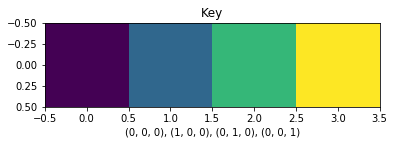

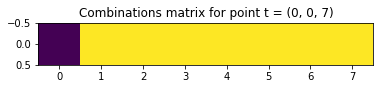

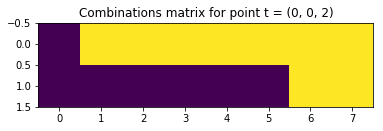

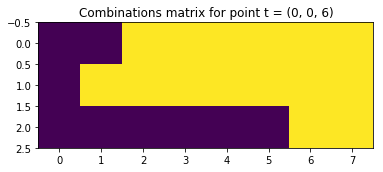

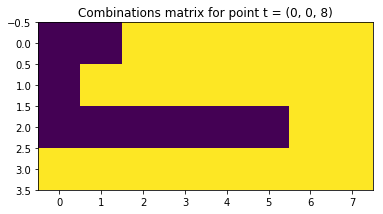

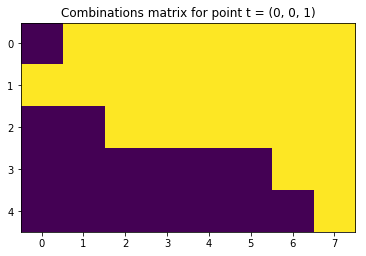

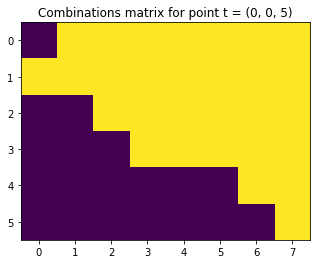

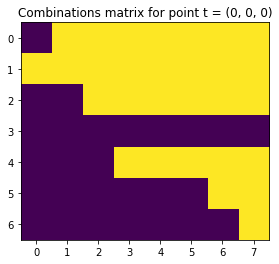

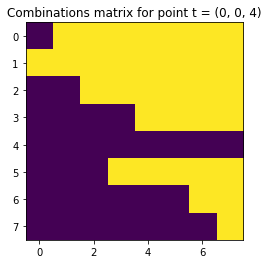

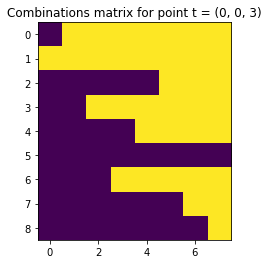

In [123]:
TetS1     = [np.array((0, 0, 0)),
             np.array((1, 0, 0)),
             np.array((0, 0, 1))]
TetS2     = [np.array((0, 0, 0)),
             np.array((0, 1, 0)),
             np.array((0, 0, 1))]
TetS_both = [np.array((0, 0, 0)),
             np.array((0, 0, 1))]

build_intersection_images(TetS1, TetS2, TetS_both, n)

(67, 35, 3), (62, 14, 7), (85, 30, 98), (37, 18, 95)
Showing points in the intersection!


E:\prog\Miniconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


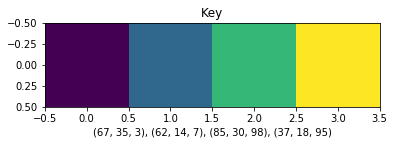

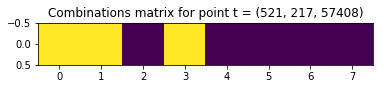

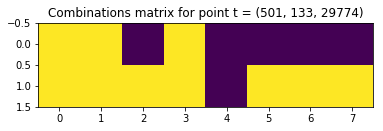

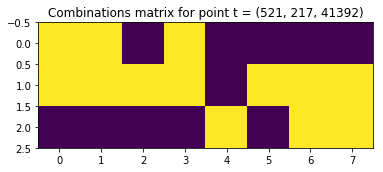

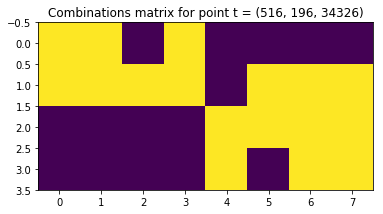

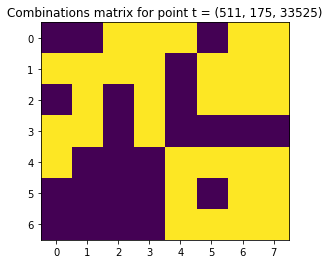

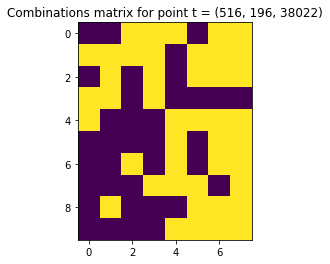

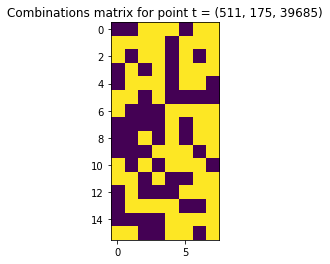

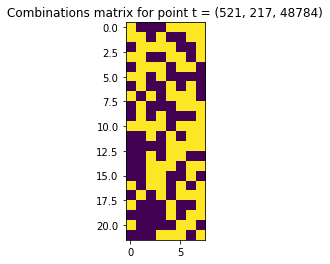

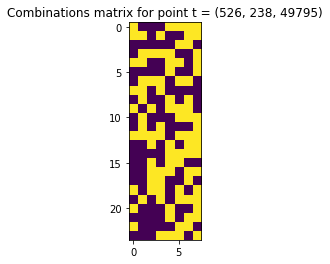

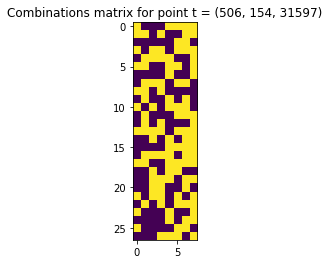

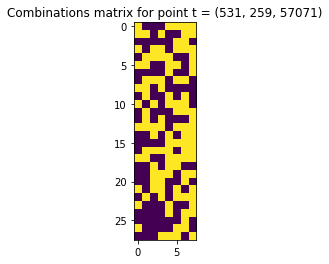

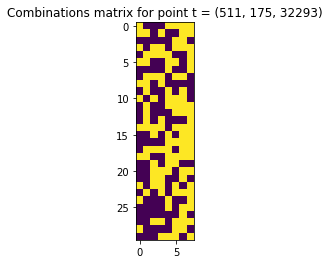

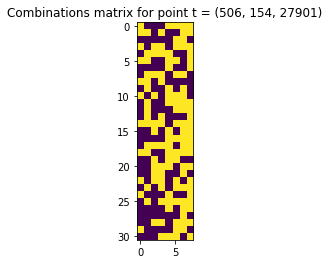

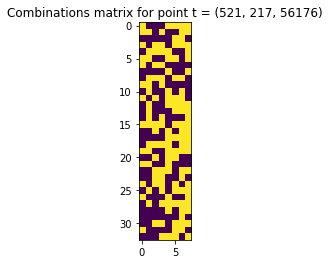

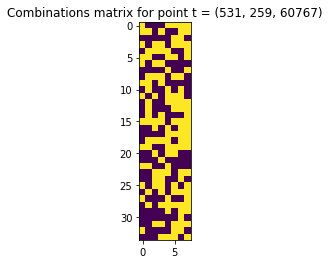

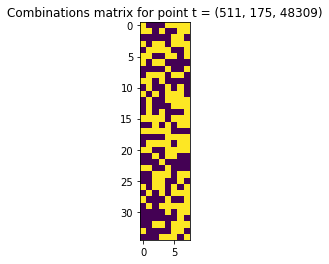

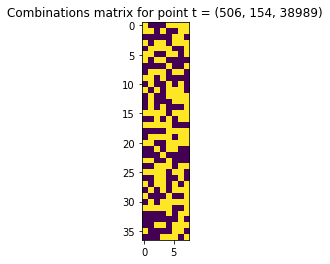

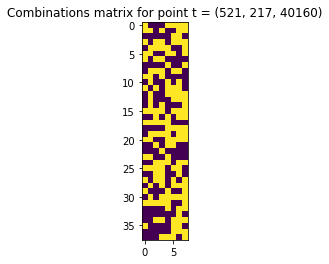

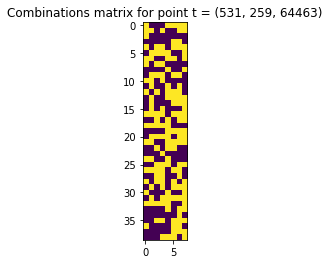

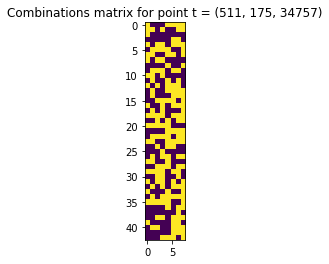

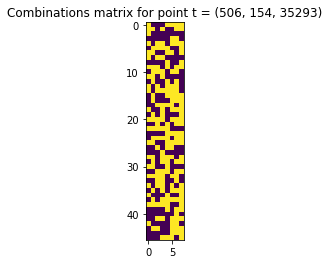

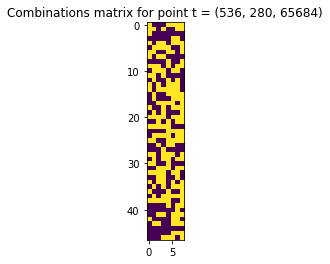

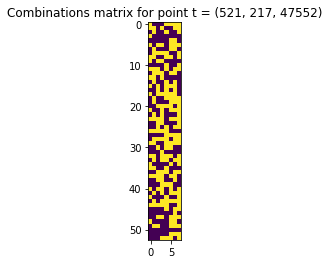

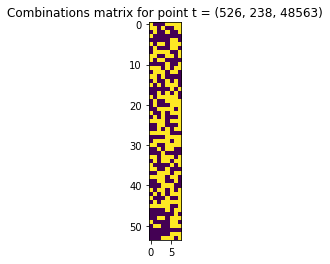

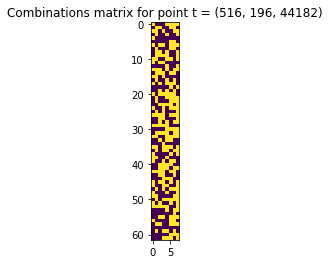

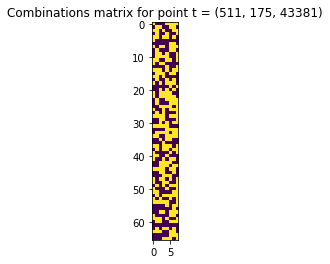

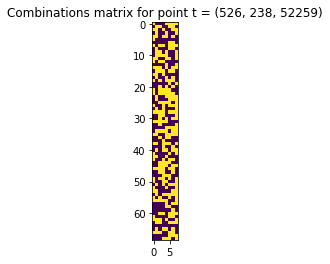

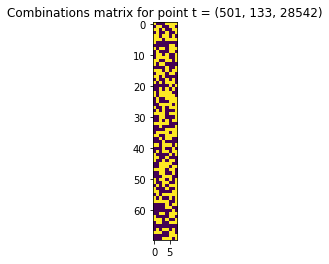

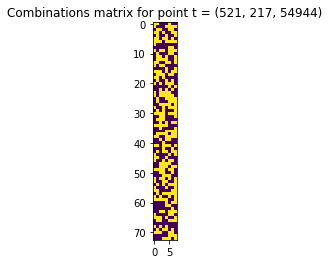

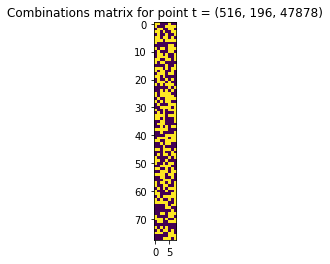

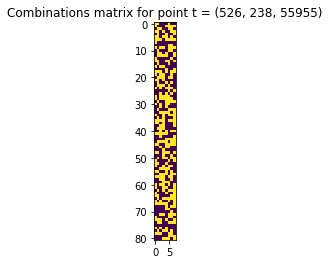

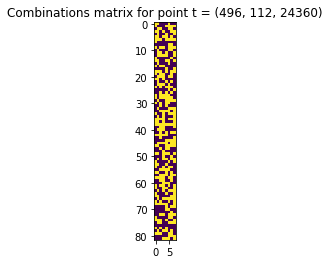

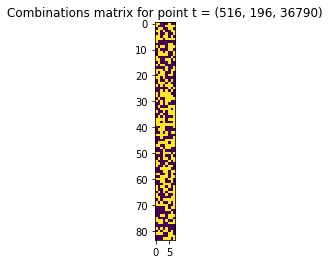

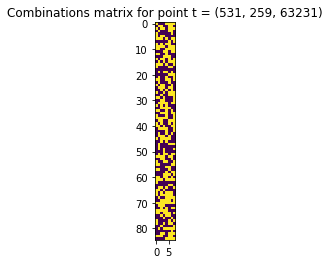

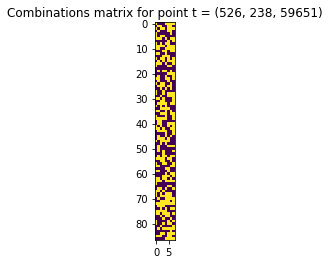

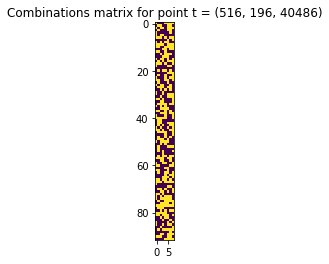

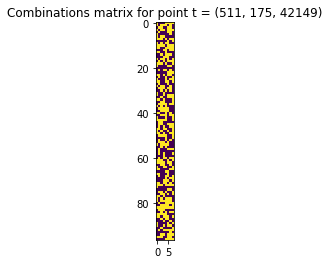

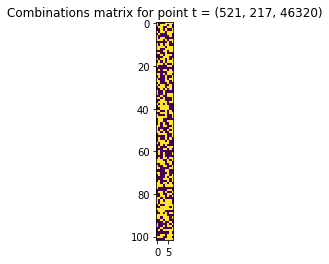

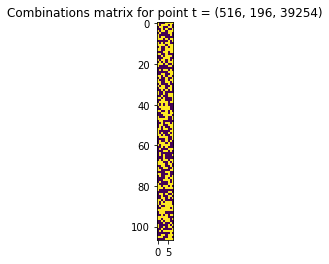

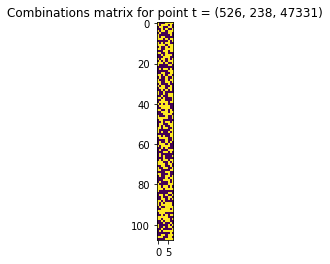

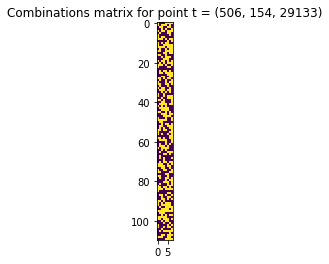

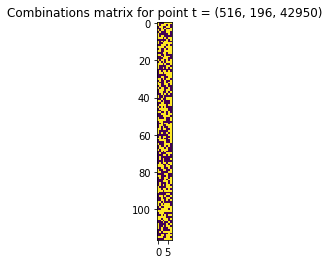

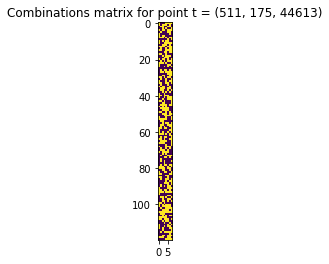

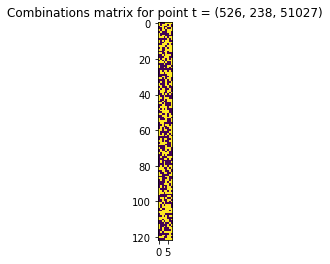

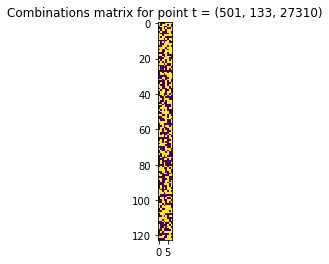

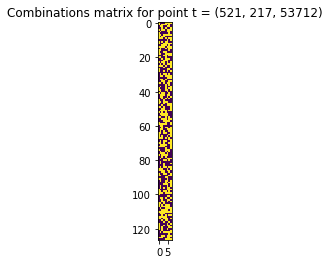

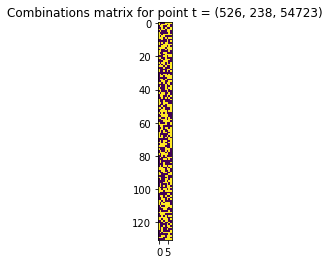

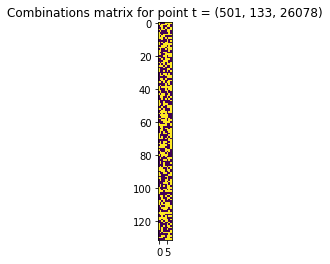

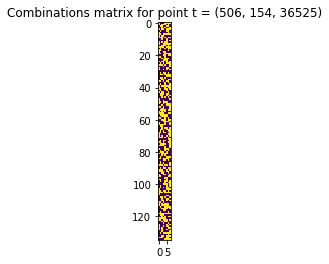

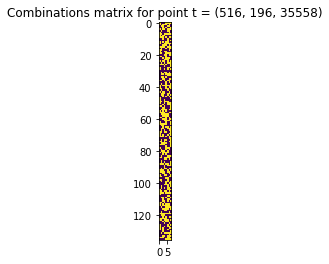

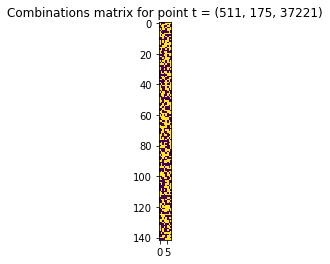

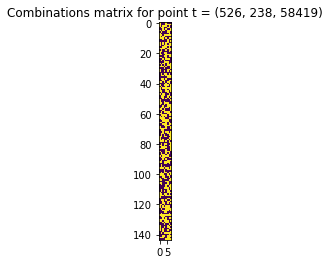

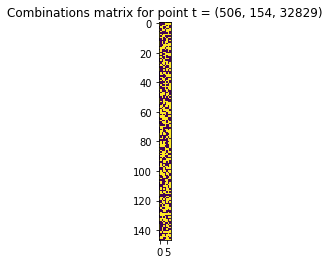

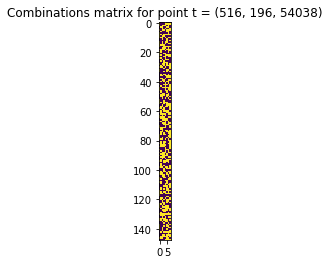

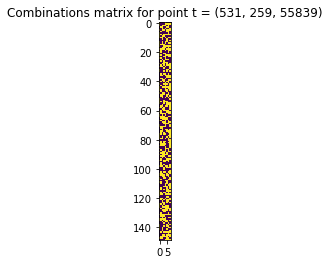

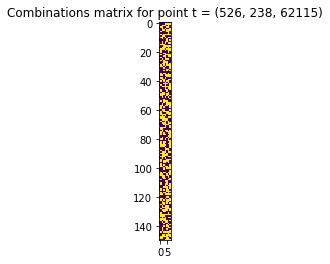

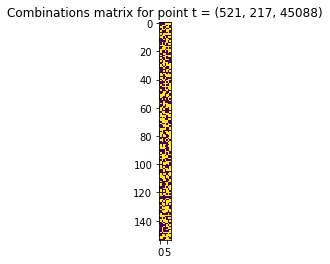

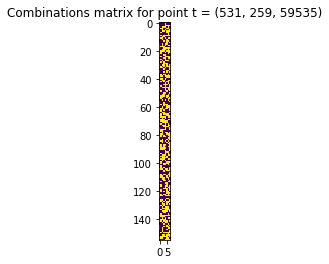

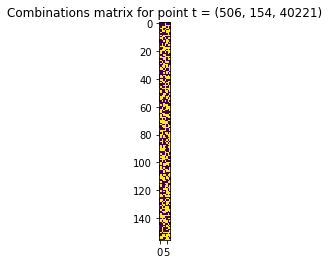

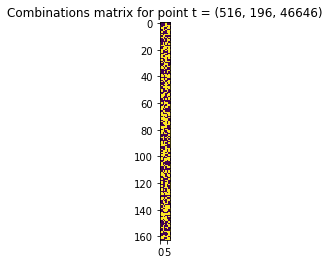

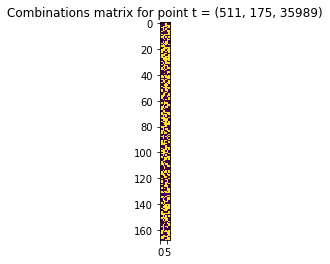

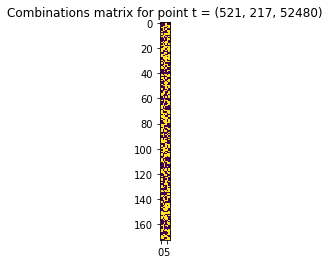

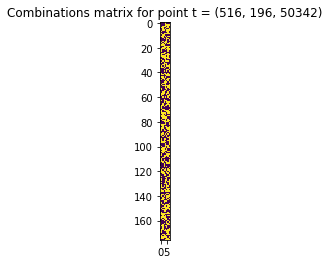

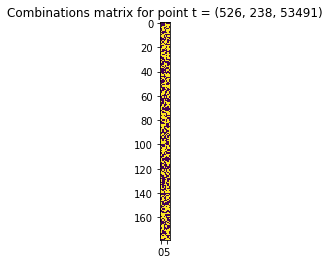

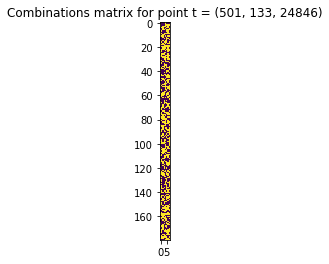

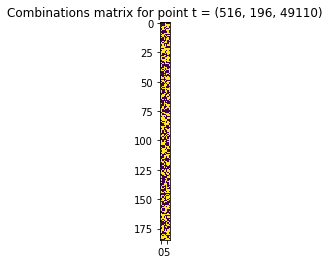

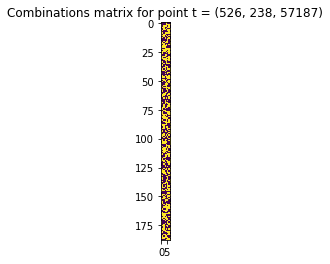

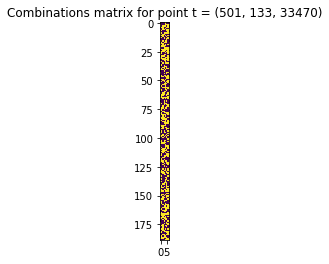

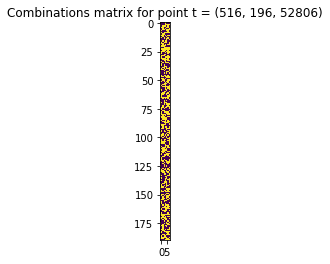

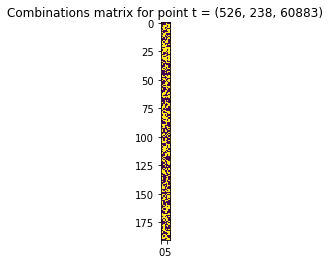

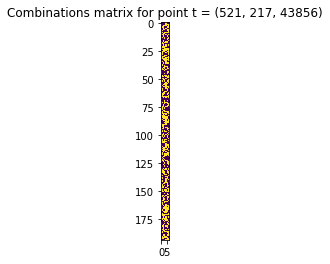

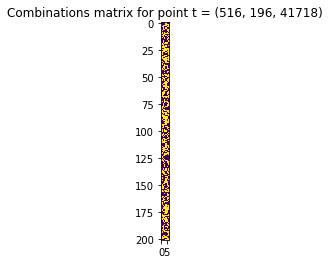

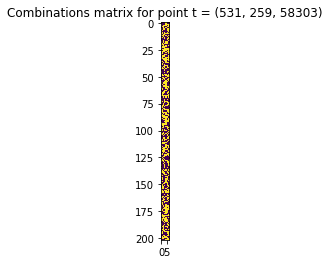

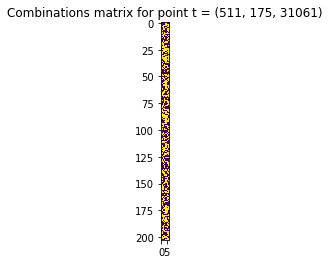

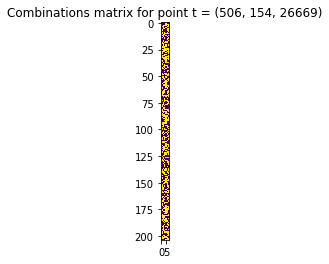

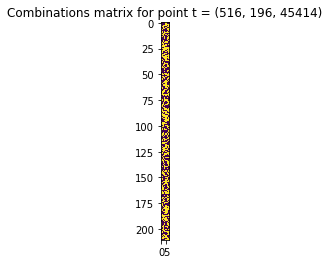

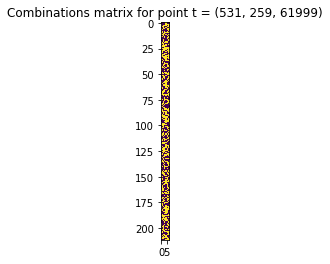

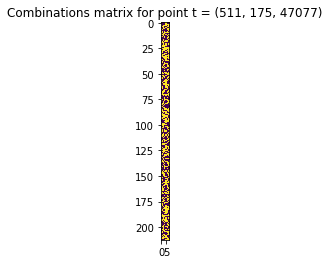

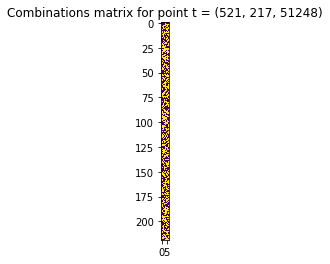

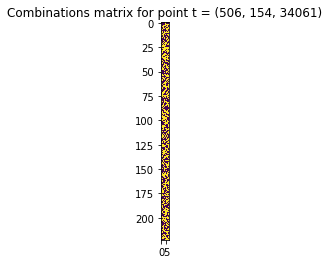

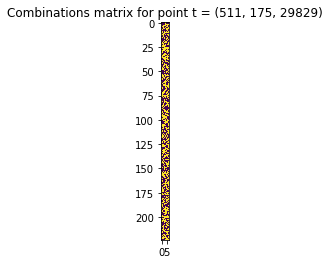

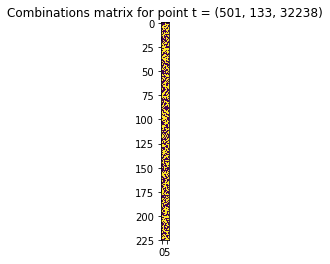

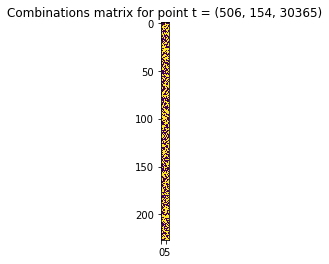

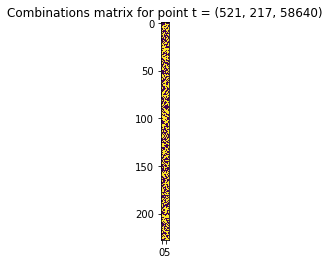

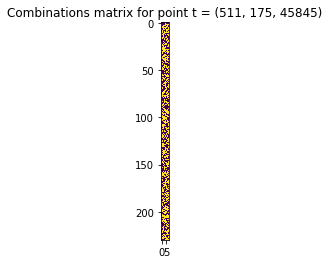

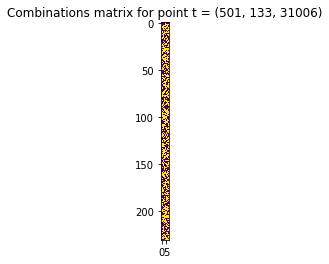

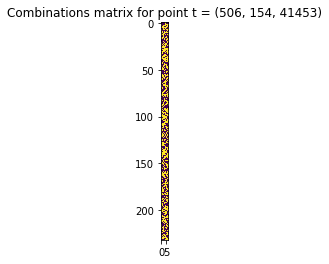

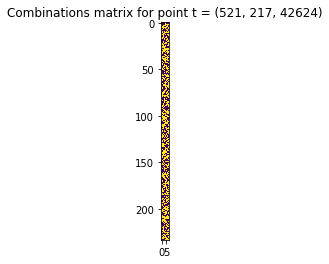

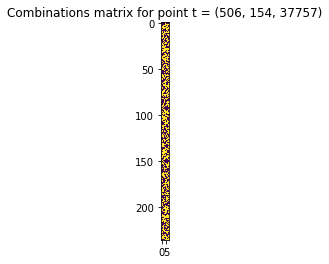

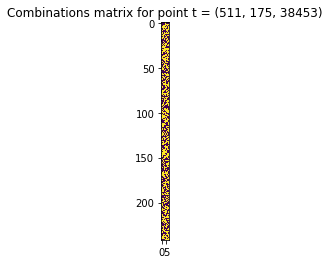

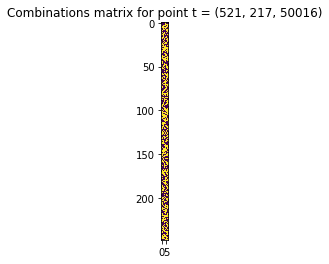

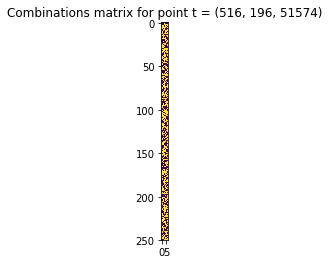

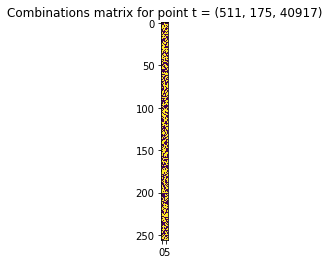

In [127]:
CrazyS1 = [
    np.array((37, 18, 95)),
    np.array((67, 35, 3)),
    np.array((62, 14, 7)),
]
CrazyS2 = [
    np.array((67, 35, 3)),
    np.array((62, 14, 7)),
    np.array((85, 30, 98)),
]
CrazyS_both = [
    np.array((67, 35, 3)),
    np.array((62, 14, 7)),
]

build_intersection_images(CrazyS1, CrazyS2, CrazyS_both, n)

# Miscellaneous/Notes

### Proof that $P_n$ of intersection is intersection of $P_n$ of pieces
**Prop.:**
$$P_n(S_1 \cap S_2) = P_n(S_1) \cap P_n(S_2).$$

**Proof:** First, let $t_1 \dotsm t_n \in P_n(S_1 \cap S_2)$. Then $t_1, \dots, t_n$ are in $S_1$ and in $S_2$, so $t_1 \dotsm t_n$ is in $P_n(S_1)$ and in $P_n(S_2)$.

Now let $t_1 \dotsm t_n \in P_n(S_1) \cap P_n(S_2)$. Then $t_1, \dots, t_n$ are in $S_1$ and in $S_2$, since the product is in both $P_n(S_1)$ and $P_n(S_2)$. But then $t_1, \dots, t_n$ are in $S_1 \cap S_2$, so $t_1 \dotsm t_n$ are in $P_n(S_1 \cap S_2)$. (TODO: this is wrong. can we make it right?)

Thus, $P_n(S_1 \cap S_2) = P_n(S_1) \cap P_n(S_2)$. $\square$